# Titanic Simply understand Best Model



### **Introduction**
This is my first stab at a Kaggle script. I have chosen to work with the Titanic dataset after spending some time on the site I finally decided to go with a competition with one of my friends advice . 

<h2 style="color:blue"><center> Don't forget to upvote📈 if you like👍🏻 it  

## Table of content:
* Import Necessary Libraries
* Handle Missing Values
* Data Visualizing and Analysis
* Correlation & Correlation Matrix
* Feature Engineering
* Predictive Modeling 
>  1. Logistic Regression
>  2. KNN Classifier
>  3. Gaussian Naive Bayes
>  4. Support Vector Machine(SVM)
>  5. Decision Tree
>  6. Random Forest
* create submission file


## Import Necessary Libraries.

In [1]:
# data processing
import pandas as pd

## linear algebra
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Get the data

In [2]:
titanic = pd.read_csv('../input/titanic/train.csv')
# Print the first 5 rows of the dataframe.
titanic.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_test = pd.read_csv('../input/titanic/test.csv')
# Print the last 5 rows of the dataframe.
titanic_test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Note: There is no  survived column in test data, which is our target variable and we will going to predict it.

## Data Exploration and Analysis

In [4]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [5]:
# Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing values in columns, here we can see there are some missing values in column "Age"

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# info method provides information about dataset like.
# total values in each column, null/not null, datatype, memory occupied etc.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Lets check missing data

In [7]:
# Let's write a function to print the total percentage of the missing values.
# (this can be a good exercise for beginners to try to write simple functions like this.)

#This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [8]:
# check missing values in training data set
check_missing_data(titanic)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


We can see that Age, Embarked and cabin has missing values.
now, lets check missing values for test data.

In [9]:
# Check missing values in test data set
check_missing_data(titanic_test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Age, Fare and cabin has missing values. we will see how to work with these missing values next.
#### lets delete the columns which are not useful for predicting the result i.e. name and ticket

In [10]:
drop_column = ['Name','Ticket']
titanic.drop(drop_column, axis= 1, inplace = True)
titanic_test.drop(drop_column,axis = 1,inplace = True)

#### Cabin has more than 75% of missing values in Train and test both dataset so many of us will think to delete it but their are more chances that the cabin name are given by the pepole survive
so lets give 1 if cabin name is present and 0 if not present

In [11]:
titanic['Cabin']=np.where(titanic['Cabin'].isnull(),0,1)
titanic_test['Cabin']=np.where(titanic_test['Cabin'].isnull(),0,1)

In [12]:
#COMPLETING: complete or delete missing values in train and test/validation dataset
dataset = [titanic, titanic_test]

# def missing_data(x):
for data in dataset:
    #complete missing age with median
    data['Age'].fillna(data['Age'].mean(), inplace = True)

    #complete missing Embarked with Mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

    #complete missing Fare with median
    data['Fare'].fillna(data['Fare'].mean(), inplace = True)
      
check_missing_data(titanic)

,Total,Percent
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0
PassengerId,0,0.0


## Data Visualizing and Analysis 
#### Let's analysis data and Check which features could contribute to a high survival rate ?

###  Survived Count
Lets visualize how many passenger & crew survived and how many not.

In [13]:
def draw(graph):
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 5,height ,ha= "center")

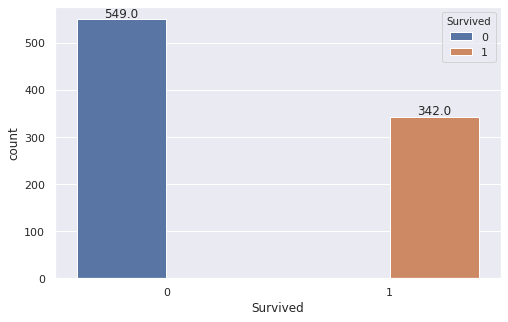

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 5))
graph= sns.countplot(x='Survived', hue="Survived", data=titanic)
draw(graph)

### 1.  Cabin vs Survived
Lets many passenger & crew survived who has cabin name.

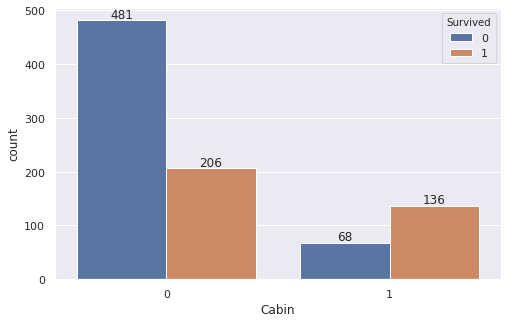

In [15]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Cabin", hue ="Survived", data = titanic)
draw(graph)

### 2. Sex vs Survived
Lets check How many male and female survival.

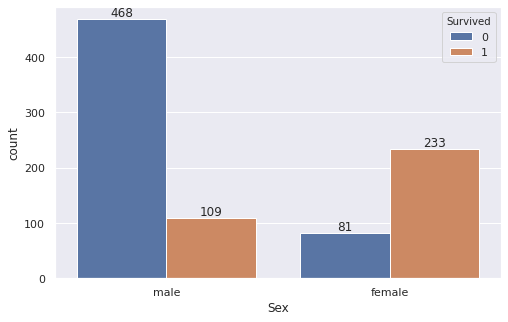

In [16]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Sex", hue ="Survived", data = titanic)
draw(graph)

As per the graph we can say that Gender is matter to survival if gender is Female then higher survival chances.

### 3.PClass vs Survived
* **PClass:** Passenger belongs to which class.
 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower

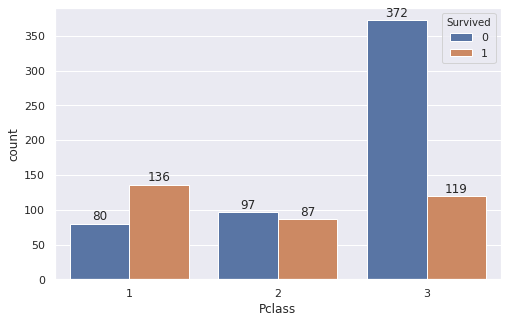

In [17]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Pclass", hue ="Survived", data = titanic)
draw(graph)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. 

### 4. Embarked vs Survived

* **Embarked:** From which location passenger go on board to Titanic.
 * C = Cherbourg
 * Q = Queenstown 
 * S = Southampton
 

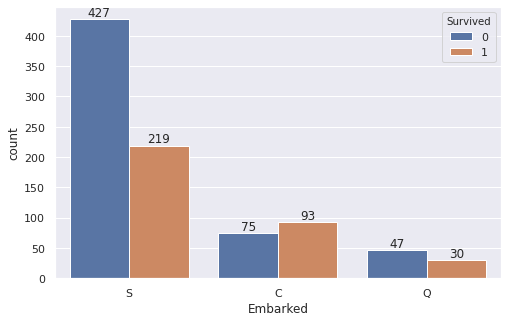

In [18]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Embarked", hue ="Survived", data = titanic)
draw(graph)

What do you think Embarked is important feature to predict high survival rate?  

From which location passenger go on board to Titanic does not matter when we think logicaly that the people survive or not.

So we can use Embarked as feature here for getting high accuracy but logically its doesn't matter. so we drop it .

As a part of data science you have to thing 360 degree angle, some features are important but in calculation(mathematically) its not, so that why you must have domain knowledge for feature selection.

In [19]:
drop_column = ['Embarked']
titanic.drop(drop_column, axis=1, inplace = True)
titanic_test.drop(drop_column,axis=1,inplace=True)

### 4. Parch vs Survived

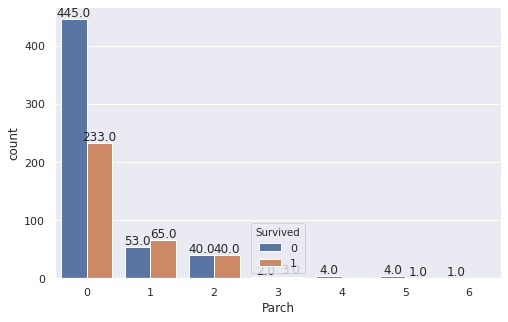

In [20]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Parch", hue ="Survived", data = titanic)
draw(graph)

### 4. SibSp vs Survived

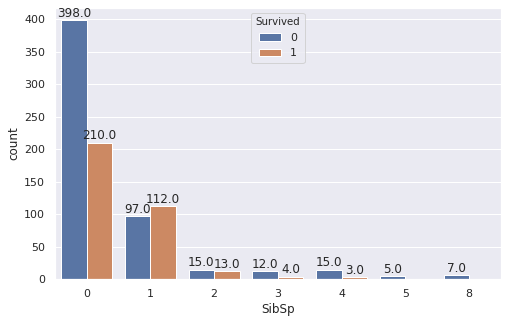

In [21]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="SibSp", hue ="Survived", data = titanic)
draw(graph)

### 5. SibSp & Parch vs Survived

**SibSp** and **Parch** would make more sense, Parents not let child die, Bond of Blood relation always help each other first, rather than helping others they think about them self and their family member. 
It is also proved by the two graphs SibSp s Survived & Parch vs Survived
So create new feature Family as a combination of SibSp and Parch,

In [22]:
# combine test and train as single to apply some function, we will use it again in Data Preprocessing
all_data=[titanic,titanic_test]

for dataset in all_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

### 6. Family vs Survived

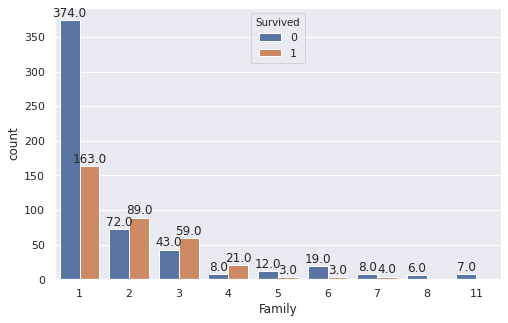

In [23]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Family", hue ="Survived", data = titanic)
draw(graph)

 ### 6. Age vs Survived


Age features are very important.

So children who have age less than 12 years have high chances to survival as parents and elder siblings think to save the younger once first and a young has more life left to leave so they where saved first.Their is one more factor sympathy with small childrens also work.

So we have created categories of people into Children, Teenager, Adults and Elders as per their age and display probability or chances of survival as per the respective age group. So lets check Count of survived for each age.

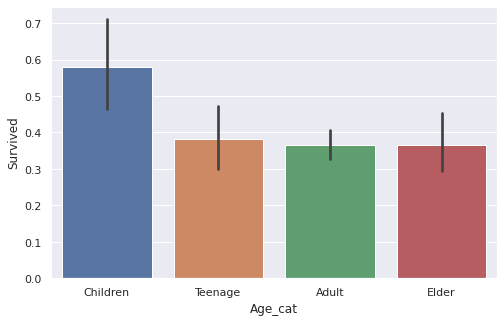

In [24]:
# create bin for age features. 
for dataset in all_data:
    dataset['Age_cat'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    
plt.figure(figsize = (8, 5))
sns.barplot(x='Age_cat', y='Survived', data=titanic)

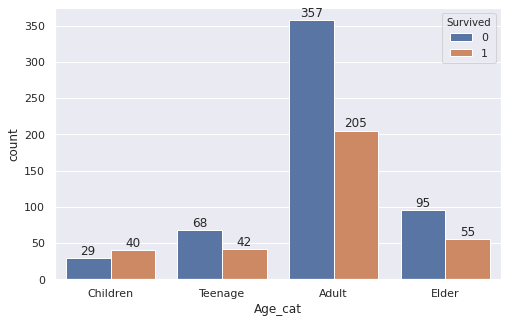

In [25]:
plt.figure(figsize = (8, 5))
ag = sns.countplot(x='Age_cat', hue='Survived', data=titanic)
draw(ag)

Here we see age is important feature so lets check relation of age and sex for survived.

This different combination give us idea for selection of correct feature by programmatically and logically.

So lets plot the graph of Age & Sex vs Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Age , Sex vs Survived')

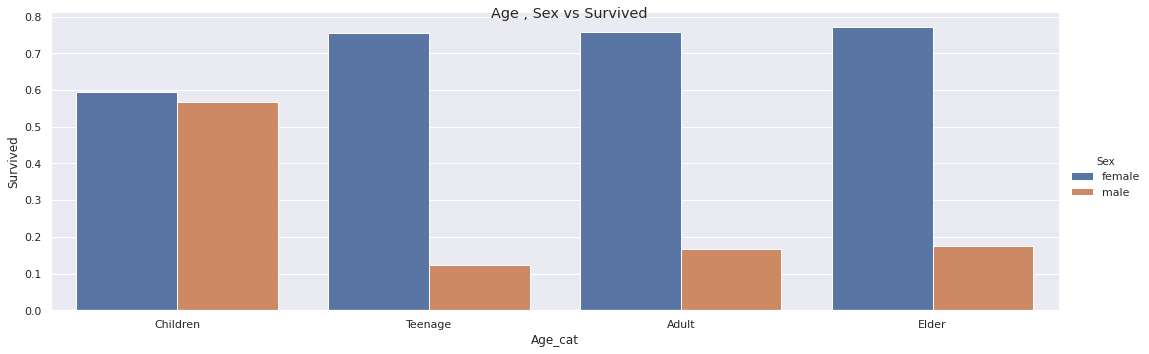

In [26]:
AAS = titanic[['Sex','Age_cat','Survived']].groupby(['Sex','Age_cat'],as_index=False).mean()
sns.factorplot('Age_cat','Survived','Sex', data=AAS
                ,aspect=3,kind='bar')
plt.suptitle('Age , Sex vs Survived')

Looks like very unfair with male passenger,

in all age band Female have more chances to survived.

**Think on this:** Male are good person to help them or Female are smart person to survive. 

### 7. Fare Vs Survived

A fare is the fee paid by a passenger for travel in Titanic in other words we can say Fare is the Ticket price.

Lets check Fare value is related to Passenger class or not? Logically it is related.

So let first create catagories Low_fare,median_fare,Average_fare,high_fare on the basis of fare and then plot graph of it.

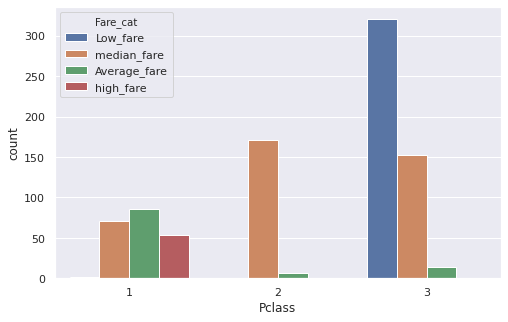

In [27]:
# create bin for fare features
for dataset in all_data:
    dataset['Fare_cat'] = pd.cut(dataset['Fare'], bins=[0,10,50,100,550], labels=['Low_fare','median_fare','Average_fare','high_fare'])
plt.figure(figsize = (8, 5))
ag = sns.countplot(x='Pclass', hue='Fare_cat', data=titanic)

So we can say that fare is correlated with Passenger class.

High fare then upper class, Low fare then lower class.

Now check For survived relation with Fare_bin and compare result of it with Pclass vs Survived.

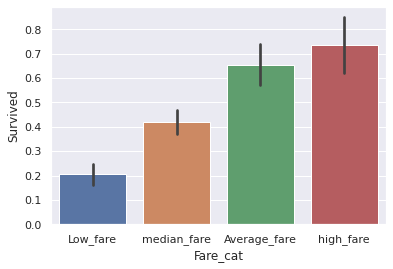

In [28]:
sns.barplot(x='Fare_cat', y='Survived', data=titanic)

High fare for passenger class one, and survived count are higher for Pclass-1 and High fare. 

Low fare for passenger class three, and survived count are lower for Pclass-3 and low fare.

so they are co-related with each other. 

Now we drop fare form our data set but before that we check correlation.

## Correlation & Correlation Matrix

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION:** If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION:** If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

In [29]:
pd.DataFrame(abs(titanic.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Cabin,0.316912
Fare,0.257307
Parch,0.081629
Age,0.069809
SibSp,0.035322
Family,0.016639
PassengerId,0.005007


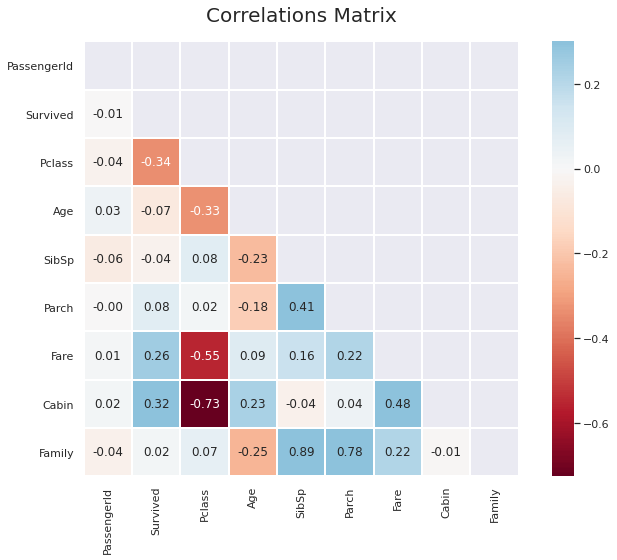

In [30]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
corr=titanic.corr()#['Survived']

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,8))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            vmax = 0.3,
            fmt='.2f',
            center = 0,
            square=True)
plt.title("Correlations Matrix", y = 1,fontsize = 20, pad = 20);

### Feature engineering

Feature engineering is the art of converting raw data into useful features. There are several feature engineering techniques that you can apply but, I am going to apply some specific ones.

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Cabin        891 non-null    int64   
 9   Family       891 non-null    int64   
 10  Age_cat      891 non-null    category
 11  Fare_cat     876 non-null    category
dtypes: category(2), float64(2), int64(7), object(1)
memory usage: 71.8+ KB


In [32]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}

for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(genders)
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [33]:
# Give age rank as per their categories of children, teenage, adult, elders.
for dataset in all_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 35), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 6
titanic['Age'].value_counts()

4    310
2    139
5    116
6    101
1     97
0     83
3     45
Name: Age, dtype: int64

In [34]:
# As we created new fetures form existing one, so we remove that one.

# Removing SibSp & Parch because we have family now. same way Age.
# We also going to remove some other features like passenger id in list, Ticket number and Name.

for dataset in all_data:
    drop_column = ['Age_cat','Fare','SibSp','Parch','Fare_cat','PassengerId']
    dataset.drop(drop_column, axis=1, inplace = True)


## Predictive Modeling
So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.

In [35]:
input_cols = ['Pclass',"Sex","Age","Cabin","Family"]
output_cols = ["Survived"]
X_train = titanic[input_cols]
y_train = titanic[output_cols]
X_test=dataset

In [36]:
dataset

,Pclass,Sex,Age,Cabin,Family
0,3,0,4,0,1
1,3,1,6,0,2
2,2,0,6,0,1
3,3,0,3,0,1
4,3,1,2,0,3
...,...,...,...,...,...
413,3,0,4,0,1
414,1,1,5,1,1
415,3,0,5,0,1
416,3,0,4,0,1


### 1. Logistic Regression:

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_lr=model.predict(X_test)
model.score(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8035914702581369

### 2. K Nearest Neighbor:

In [38]:
model = KNeighborsClassifier(n_neighbors = 3) 
model.fit(X_train, y_train)  
y_pred_knn = model .predict(X_test)  
model.score(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.7317620650953984

### 3. Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
y_pred_gnb=model.predict(X_test) 
model.score(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7912457912457912

### 4. Linear Support Vector Machine:

In [40]:
model  = LinearSVC()
model.fit(X_train, y_train)

y_pred_svc = model.predict(X_test)
model.score(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8103254769921436

### 5. Random Forest:

In [41]:
model  = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)
model.score(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.856341189674523

### 6. Decision tree

In [42]:
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test) 
model.score(X_train,y_train)

0.856341189674523

## code to create submission file 

In [43]:
titanic_test = pd.read_csv('../input/titanic/test.csv')
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": y_pred_rf   # I have given prediction of random forest just change it to save prediction of other models here
    })
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Which is the best Model ?
as per me its random forest as much I have seen while submission

So lets Understand little bit more about Random Forest.

### What is Random Forest ?
Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: 

**Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.**

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

## Conclusion
This was my very first Kaggle competition that I tried.

Thank you for taking the time to read through my first exploration of a Kaggle dataset.

For the moment, let me know if you found this notebook useful or you just liked it: I would really appreciate it!

## Plz Upvote!